### 1. Ready to analysis

#### 1) Import packages

In [1]:
import pandas as pd
import numpy as np
import random as rd

import itertools
import os

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

#### 2) load dataset

In [2]:
# sklearn dataset : breast cancer

breast_cancer = load_breast_cancer()
dir(breast_cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
# setting X, Y

X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
Y = pd.DataFrame(breast_cancer.target, columns=["class"])
df = pd.concat([X, Y], axis=1)
print(df.shape)
df

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


#### 3) Exploratory Data Analysis & Pre-process

In [4]:
# Check the y value: to choose a right method for model evaluation
# The imbalance between samples has not been observed, so we can use the method based on confusion matrix

Y.value_counts()

class
1        357
0        212
dtype: int64

In [5]:
# Identifying the properties of features: continuous ot discrete variables, the needs for dummy variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
for i in df.columns:
    print(df[i].value_counts())

12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: mean radius, Length: 456, dtype: int64
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: mean texture, Length: 479, dtype: int64
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: mean perimeter, Length: 522, dtype: int64
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1
181.0     1
Name: mean area, Length: 539, dtype: int64
0.10070    5
0.11500    4
0.10540    4
0.10750    4
0.10630    3
          ..
0.08876    1
0.09965    1
0.13230    1
0.08968    1
0.05263    1
Name: mean smoothness, Length: 474, dtype: int64
0.11470    3
0.12060    3
0.07698    2
0.05743    2
0.03834    2
          ..
0.05562    1
0.06141    1
0.04695    1
0.1

In [7]:
# dataset in sklearn package -> saving in json file format
os.chdir('C:/Users/kw764/Desktop/kw/00_lecture/2022-2/BA/data')

df.to_json('breast.json', orient='table')

In [8]:
# scaling X set

for i in X.columns:
    scaler.fit(np.array(X[i]).reshape(-1, 1))
    X[i] = scaler.transform(np.array(X[i]).reshape(-1, 1))

X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [9]:
# split train & validate & test set

X_tr, X_tmp, y_tr, y_tmp = train_test_split(X, Y, test_size = 0.4, random_state=1)
X_val, X_te, y_val, y_te = train_test_split(X_tmp, y_tmp, test_size = 0.5, random_state=1)

print(len(X_tr))
print(len(X_val))
print(len(X_te))
print(len(y_tr))
print(len(y_val))
print(len(y_te))

341
114
114
341
114
114


### 2. Main Analysis : in whole Variables

#### 1) SVM(optimal params)

In [10]:
# fitting with optimal hyperparameter and check the result of validation set : C=39~87 -> C=50(간편성)
gaussian_opt = SVC(kernel = "rbf", C=3.5, gamma=1.05, random_state=1)
gaussian_opt.fit(X_tr, y_tr)

opt_pred = gaussian_opt.predict(X_val)
print("---Confusion Matrix---")
print(confusion_matrix(y_val, opt_pred))
print(" ")
print("---Index for Evaluation---")
print(classification_report(y_val, opt_pred))

---Confusion Matrix---
[[42  4]
 [ 3 65]]
 
---Index for Evaluation---
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        46
           1       0.94      0.96      0.95        68

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



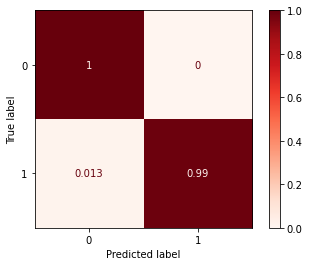

In [11]:
# Comparing result of predicting testing set with non-parameter and optimal parameter
plot_confusion_matrix(gaussian_opt,
                      X_te, y_te,                   
                      cmap=plt.cm.Reds, 
                      normalize='true')

plt.show()

#### 2) Logistic regression

###### - fitting model & tuning params

In [18]:
# logistic regression modelling

logit = LogisticRegression(random_state=1, C=1.0)
logit.fit(X_tr, y_tr)

logit_pred = logit.predict(X_val)
print("---Confusion Matrix---")
print(confusion_matrix(y_val, logit_pred))
print(" ")
print("---Index for Evaluation---")
print(classification_report(y_val, logit_pred))

---Confusion Matrix---
[[42  4]
 [ 1 67]]
 
---Index for Evaluation---
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        46
           1       0.94      0.99      0.96        68

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [20]:
# cost C up

logit = LogisticRegression(random_state=1, C=10.0)
logit.fit(X_tr, y_tr)

logit_pred = logit.predict(X_val)
print("---Confusion Matrix---")
print(confusion_matrix(y_val, logit_pred))
print(" ")
print("---Index for Evaluation---")
print(classification_report(y_val, logit_pred))

---Confusion Matrix---
[[42  4]
 [ 3 65]]
 
---Index for Evaluation---
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        46
           1       0.94      0.96      0.95        68

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [21]:
# cost C down

logit = LogisticRegression(random_state=1, C=0.1)
logit.fit(X_tr, y_tr)

logit_pred = logit.predict(X_val)
print("---Confusion Matrix---")
print(confusion_matrix(y_val, logit_pred))
print(" ")
print("---Index for Evaluation---")
print(classification_report(y_val, logit_pred))

---Confusion Matrix---
[[40  6]
 [ 0 68]]
 
---Index for Evaluation---
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        46
           1       0.92      1.00      0.96        68

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [28]:
# adjust C

logit = LogisticRegression(random_state=1, C=0.3)
logit.fit(X_tr, y_tr)

logit_pred = logit.predict(X_val)
print("---Confusion Matrix---")
print(confusion_matrix(y_val, logit_pred))
print(" ")
print("---Index for Evaluation---")
print(classification_report(y_val, logit_pred))

---Confusion Matrix---
[[41  5]
 [ 1 67]]
 
---Index for Evaluation---
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        46
           1       0.93      0.99      0.96        68

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



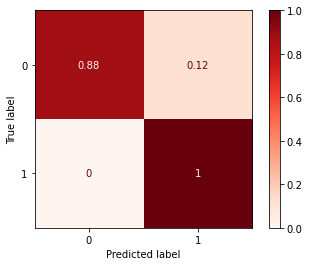

In [26]:
# optimal in cost C = 1.0(in heuristically judging)
# testing model

plot_confusion_matrix(logit,
                      X_te, y_te,                   
                      cmap=plt.cm.Reds, 
                      normalize='true')

plt.show()

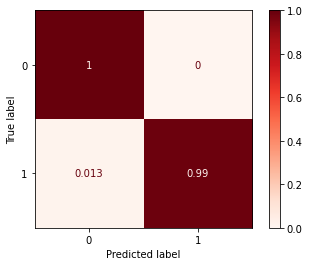

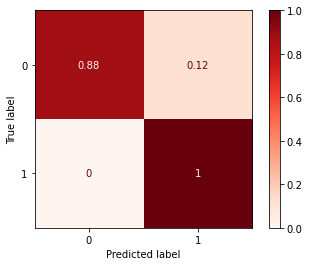

In [27]:
# Comparing result of predicting testing set with optimal SVM and optimal logistic
plot_confusion_matrix(gaussian_opt,
                      X_te, y_te,                   
                      cmap=plt.cm.Reds, 
                      normalize='true')

plt.show()

plot_confusion_matrix(logit,
                      X_te, y_te,                   
                      cmap=plt.cm.Reds, 
                      normalize='true')

plt.show()